1. Read in the ‘longley.dat’ with the response (number of people employed) in the first column and six
explanatory variables in the other columns (GNP implicit price deflator, Gross National Product,
number of unemployed, number of people in the armed forces, “noninstitutionalized” population % 14
years of age, year). Include an intercept in you model.

In [6]:
import pandas as pd
import numpy as np

colnames = ["num_employed","price_deflat","gnp","num_unemployed","num_armed_forces","percent_14","year"]

# Create a column of ones

# Read the .dat file into a pandas dataframe
longley = pd.read_csv('longley.dat', delim_whitespace = True)
longley.columns = colnames
intercept = np.ones((len(longley), 1))
longley["Intercept"] = intercept 
longley

,num_employed,price_deflat,gnp,num_unemployed,num_armed_forces,percent_14,year,Intercept
0,61122,88.5,259426,2325,1456,108632,1948,1.0
1,60171,88.2,258054,3682,1616,109773,1949,1.0
2,61187,89.5,284599,3351,1650,110929,1950,1.0
3,63221,96.2,328975,2099,3099,112075,1951,1.0
4,63639,98.1,346999,1932,3594,113270,1952,1.0
5,64989,99.0,365385,1870,3547,115094,1953,1.0
6,63761,100.0,363112,3578,3350,116219,1954,1.0
7,66019,101.2,397469,2904,3048,117388,1955,1.0
8,67857,104.6,419180,2822,2857,118734,1956,1.0
9,68169,108.4,442769,2936,2798,120445,1957,1.0


2. Assuming linear model y ∼ N (Xβ, p σ I), compute:

- regression coefficients β̂ 2= (X X) X 0y
- standard errors of β̂, which is σ̂ diag((X X) )
- variance estimate σ̂ = (y − X β̂) (y − X β̂)/(n − p) 

using following methods: 
- GE/LU decomposition 
- Cholesky decomposition
- QR decomposition 

compare the computation speed for each method. Please compute them directly
using numerical linear algebra functions; you can use the “black-box” function (e.g., lm() in R or
sklearn.linear model.LinearRegression in python) only to check your results. (Hint: chol2inv() function in R computes the inverse of a matrix from its Cholesky factor. In python, you may try cho solve())



In [7]:
from scipy.linalg import lu,cho_solve,cho_factor
import time

y = longley["num_employed"]
X = longley.drop(["num_employed","year","percent_14","price_deflat"], axis = 1)

#def linear_regression(X,y,method):
#    if method is "LU":
#        
def linear_regression(X,y,method):
    
    
    n = X.shape[0]
    p = X.shape[1]
    b = np.dot(X.T, y)
    A = np.dot(X.T, X)
    
    if method == "LU": 
        
        start_time = time.time()
        
        # LU decomposition
        P, L, U = lu(A)
        A_inv = np.linalg.solve(U, np.linalg.solve(L, P.dot(np.eye(X.shape[1]))))
        # end the timer
        end_time = time.time()
        
    if method == "Cholesky":
        
        start_time = time.time()
        A_inv = cho_solve(cho_factor(A,lower=True), np.eye(p))
        # end the timer
        end_time = time.time()
        
    if method == "QR":
        
        
        start_time = time.time()
        # QR decomposition 
        q,r  = np.linalg.qr(A)
        A_inv = np.linalg.solve(r,np.linalg.solve(q,np.eye(p)))
        # end the timer
        end_time = time.time()

    beta_hat = A_inv @ b
    variance_hat = ((y - X @ beta_hat).T @ (y - X @ beta_hat)) / (n - p)
    se_beta_hat = np.sqrt(variance_hat) * np.sqrt(np.diag(A_inv))
    
    # compute the total execution time
    execution_time = end_time - start_time
    
    beta_df = pd.DataFrame([[method,beta_hat[0],beta_hat[1],beta_hat[2],beta_hat[3]]],columns = ["Method","Beta Hat 1","Beta Hat 2","Beta Hat 3","Intercept"])
    se_df = pd.DataFrame([[method,se_beta_hat[0],se_beta_hat[1],se_beta_hat[2],se_beta_hat[3]]],columns = ["Method","SE Beta Hat 1","SE Beta Hat 2","SE Beta Hat 3","SE Intercept"])
    return_data = pd.DataFrame(
        [[
        method, 
        execution_time,
        variance_hat,
        beta_hat[0],
        beta_hat[1],
        beta_hat[2],
        beta_hat[3],
        se_beta_hat[0],
        se_beta_hat[1],
        se_beta_hat[2],
        se_beta_hat[3]
        ]],
        columns = [
            "Method",
            "Execution Time",
            "Variance Estimate",
            "Beta Hat 1",
            "Beta Hat 2",
            "Beta Hat 3",
            "Intercept",
            "SE Beta Hat 1",
            "SE Beta Hat 2",
            "SE Beta Hat 3",
            "SE Intercept"
        ] 
    )
    
    return return_data 


pd.concat([
linear_regression(X,y,"LU"),
linear_regression(X,y,"Cholesky"),
linear_regression(X,y,"QR")
],
    axis = 0
    )

,Method,Execution Time,Variance Estimate,Beta Hat 1,Beta Hat 2,Beta Hat 3,Intercept,SE Beta Hat 1,SE Beta Hat 2,SE Beta Hat 3,SE Intercept
0,LU,0.000196,249175.698239,0.040812,-0.785861,-0.460706,53195.301418,0.0023,0.226477,0.279827,867.017778
0,Cholesky,0.000118,249175.698239,0.040812,-0.785861,-0.460706,53195.301418,0.0023,0.226477,0.279827,867.017778
0,QR,0.000285,249175.698239,0.040812,-0.785861,-0.460706,53195.301418,0.0023,0.226477,0.279827,867.017778


3. One popular regularization method is the ridge regression, which estimates regression coefficients by
minimizing a penalized least squares criterion 1 λ ky − Xβk22 + kβk22 
show that the ridge solution is given by
β̂λ = (X 0 X + λIp )−1 X 0 y.

Our equation that we want to minimize is: 

$$\frac{1}{2}\lVert{y - X\beta}\rVert^2_2 + \lVert \beta \rVert^2_2$$

We can rewrite this equation as:

$$\frac{1}{2}[(y - X\beta)^T(y - X\beta) + \lambda\beta^T\beta]$$

We can simplify this equation and ignore the constant for now:

$$(y^T - \beta^T X^T)(y - X\beta) + \lambda\beta^T\beta$$
$$z = y^Ty - 2\beta^T X^T y + \beta^T X^T \beta X + \lambda\beta^T\beta$$

Now we can take the partial derivative with respect to $\beta$:

$$\frac{\partial z}{\partial \beta} = -2X^Ty + 2X^TX\beta + 2\lambda\beta$$

The constant cancels out and we can set this result equal to 0 and solve for $\beta$:

$$0 = -2X^Ty + 2X^TX\beta + 2\lambda\beta $$
$$X^Ty = X^TX\beta + \lambda\beta$$ 
$$X^Ty = \beta(X^TX + \lambda I)$$ 
$$\beta = (X^TX + \lambda I)^{-1}X^Ty$$

4. Compute the ridge regression estimates β̂λ at a set of different values of λ (e.g., 0, 1, 2, . . . , 100) by
solving it as a least squares problem. Plot the `2 -norm of the ridge coefficients kβ̂λ k as a function of
λ. You can use either QR or Cholesky method.

<Axes: xlabel='lambda_val', ylabel='norm'>

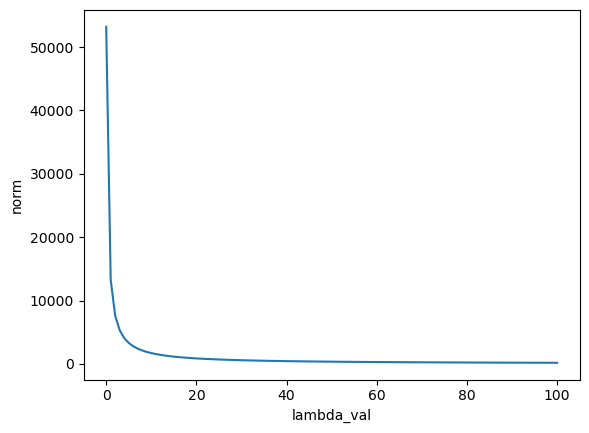

In [8]:
import seaborn as sns

# calculate the ridge regression norm
def ridge_regression(X,y,lambda_val):
    p = X.shape[1]
    
    A = X.T @ X + (lambda_val * np.eye(p))
    b = X.T @ y
    
    q,r = np.linalg.qr(A)
    beta_hat = np.linalg.solve(r,np.linalg.solve(q,b)) 
    
    return np.linalg.norm(beta_hat)

norms = []
# iteratively calculate ridge regression norm for each lambda value
for lambda_val in range(0,101):
    norms.append([lambda_val,ridge_regression(X,y,lambda_val)])
norm_df = pd.DataFrame(norms, columns = ["lambda_val","norm"])


sns.lineplot(data= norm_df,x ="lambda_val",y = "norm" )

+--------------------+--------------------+----------+
|                   X|                   y|lambda_val|
+--------------------+--------------------+----------+
|[259426.0,2325.0,...|[61122.0,60171.0,...|         0|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         1|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         2|
|[259426.0,2325.0,...|[61122.0,60171.0,...|        35|
|[259426.0,2325.0,...|[61122.0,60171.0,...|        36|
|[259426.0,2325.0,...|[61122.0,60171.0,...|        37|
|[259426.0,2325.0,...|[61122.0,60171.0,...|        70|
|[259426.0,2325.0,...|[61122.0,60171.0,...|        71|
|[259426.0,2325.0,...|[61122.0,60171.0,...|        72|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         4|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         5|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         6|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         7|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         8|
|[259426.0,2325.0,...|[61122.0,60171.0,...|         9|
+---------

<Axes: xlabel='lambda_val', ylabel='norm'>

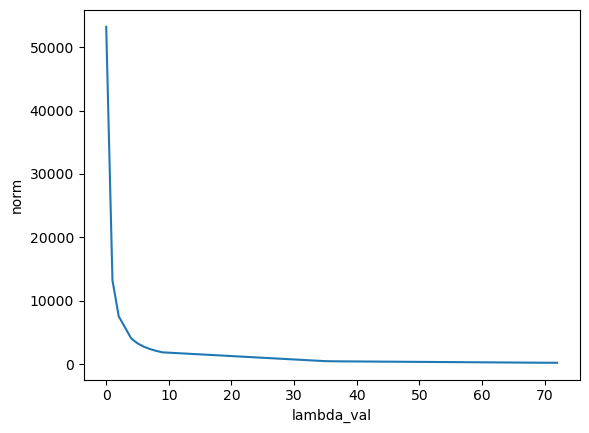

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf,monotonically_increasing_id,lit,col,array
from pyspark.ml.linalg import Vectors,VectorUDT,Matrices
from pyspark.sql.types import StructType, StructField, IntegerType, ArrayType, DoubleType, FloatType

spark = SparkSession.builder.appName("l2 norm").getOrCreate()

@udf(returnType=FloatType())
def ridge_regression(X,y,lambda_val):
    X = X.reshape((-1, 4)) 
    p = X.shape[1] 
    
    A = X.T @ X + (lambda_val * np.eye(p))
    b = X.T @ y
    
    q,r = np.linalg.qr(A)
    beta_hat = np.linalg.solve(r,np.linalg.solve(q,b)) 
    
    return float(np.linalg.norm(beta_hat))


# Create a Spark DataFrame 
data = spark.createDataFrame(X)

# convert the pandas dataframe to a spark vector
X_spark = Vectors.dense(X.values)
# convert the Pandas series to a Spark vector
y_spark = Vectors.dense(y.values)

# create a function that returns a Spark vector
def X_create_vector():
    return X_spark

# create a UDF that wraps the create_vector function
X_vector_udf = udf(X_create_vector, VectorUDT())

# create a function that returns a Spark vector
def y_create_vector():
    return y_spark

# create a UDF that wraps the create_vector function
y_vector_udf = udf(y_create_vector, VectorUDT())

# use the Vectors.dense() function to create dense vector columns and lambda values
data = data.withColumn('X', X_vector_udf())
data = data.withColumn('y', y_vector_udf())
data = data.withColumn("lambda_val", monotonically_increasing_id() % 101)

data = data.select(col('X'),col('y'),col('lambda_val'))

data.show()

data = data.withColumn('norm', ridge_regression(data['X'], data['y'], data['lambda_val']))
data = data.select(col('lambda_val'),col('norm'))

sns.lineplot(data=data.toPandas(),x ="lambda_val",y = "norm" )

6. Find out which method is the lm() function in R is using? And which algorithm is being used? Or
find out which method is the linear regression function (there are multiple, but only need to choose
one) in numpy/scipy is using? And which algorithm is being used?

The numpy.linalg.lstsq method which minimizes the least squares solution $AX = b$ uses SVD to solve the equation. 